### 목표
- DecisionTree 모델 사용하기
- 모델 최적화를 해보자.

#### 1.모델정의

In [331]:
from sklearn.tree import DecisionTreeRegressor

In [332]:
house_model = DecisionTreeRegressor()

#### 2. 모델학습
- 데이터 로딩 후 탐색
- 문제와 정답 추출

In [333]:
import pandas as pd

In [375]:
# 데이터 로딩(훈련용데이터, 평가용데이터)
test= pd.read_csv("./data/house/test.csv")
test.head()
train=pd.read_csv("./data/house/train.csv")
train.head()
# 전체 데이터 갯수 파악
display(test.shape) # 훈련용 데이터
display(train.shape) # 평가용 데이터


(3395, 21)

(10185, 22)

In [335]:
# 전체 컬럼이 무엇이 있는지 파악
# 1.수치형  (일반적으로 숫자형태, 데이터 범위가 정해져 있지 않다. 최소, 최대가 안 정해져 있음.)
# 2. 범주형 (정해진 종류에서만 나온다. ex:혈액형, 성별)
# 기타. 비정형 텍스트 (ex: 사람이름, 집주소)
train.info()
# 누락된 데이터 -> 결측치


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10185 entries, 0 to 10184
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10185 non-null  int64  
 1   Suburb         10185 non-null  object 
 2   Address        10185 non-null  object 
 3   Rooms          10185 non-null  int64  
 4   Type           10185 non-null  object 
 5   Method         10185 non-null  object 
 6   SellerG        10185 non-null  object 
 7   Date           10185 non-null  object 
 8   Distance       10185 non-null  float64
 9   Postcode       10185 non-null  int64  
 10  Bedroom2       10185 non-null  int64  
 11  Bathroom       10185 non-null  int64  
 12  Car            10142 non-null  float64
 13  Landsize       10185 non-null  int64  
 14  BuildingArea   5367 non-null   float64
 15  YearBuilt      6153 non-null   float64
 16  CouncilArea    9174 non-null   object 
 17  Lattitude      10185 non-null  float64
 18  Longti

In [336]:
# 기술통계 확인 -> include='all' 범주형 통계 값 포함(고유값, 최빈값)
train.describe(include='all')

,Id,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
count,10185.000000,10185,10185,10185.000000,10185,10185,10185,10185,10185.000000,10185.000000,...,10142.000000,10185.000000,5367.000000,6153.000000,9174,10185.000000,10185.000000,10185,10185.000000,1.018500e+04
unique,NaN,310,10066,NaN,3,5,243,58,NaN,NaN,...,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN,NaN
top,NaN,Reservoir,2 Bruce St,NaN,h,S,Nelson,27/05/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN,NaN
freq,NaN,261,3,NaN,7106,6753,1156,364,NaN,NaN,...,NaN,NaN,NaN,NaN,887,NaN,NaN,3525,NaN,NaN
mean,6802.613942,NaN,NaN,2.943250,NaN,NaN,NaN,NaN,10.198213,3105.172607,...,1.613883,573.426411,154.137372,1964.904599,NaN,-37.809763,144.995347,NaN,7447.172018,1.077961e+06
std,3926.702100,NaN,NaN,0.952794,NaN,NaN,NaN,NaN,5.866640,90.198740,...,0.959076,4550.757180,614.711880,37.603561,NaN,0.079922,0.104255,NaN,4354.473015,6.364301e+05
min,3.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000,1.310000e+05
25%,3384.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,6.200000,3044.000000,...,1.000000,178.000000,93.920000,1940.000000,NaN,-37.857700,144.929500,NaN,4380.000000,6.500000e+05
50%,6838.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,9.300000,3084.000000,...,2.000000,448.000000,127.000000,1970.000000,NaN,-37.802900,145.000130,NaN,6543.000000,9.050000e+05
75%,10223.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,13.000000,3149.000000,...,2.000000,652.000000,175.000000,2000.000000,NaN,-37.756710,145.059280,NaN,10331.000000,1.330000e+06


In [337]:
# 문제와 정답 추출
# 결측치가 존재하는 컬럼과 문자형태의 컬럼은 제외
#X_train= 3개
#y_train= Price만 자르기

X_train= train[['Rooms','Bathroom', 'Bedroom2']]
y_train= train['Price']

In [338]:
# train -> 7:3 비율로 train2, validation
from sklearn.model_selection import train_test_split
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, random_state=3) 

In [339]:
X_train2.shape, y_train2.shape

((7638, 3), (7638,))

In [340]:
X_val.shape, y_val.shape

((2547, 3), (2547,))

In [341]:
# 모델학습
house_model.fit(X_train2, y_train2)

DecisionTreeRegressor()

#### 3. 모델예측

In [342]:
pre = house_model.predict(X_val)
pre

array([ 426280.94842407,  999800.8640553 ,  753657.81142177, ...,
       1143568.10545723,  999800.8640553 , 1960404.16666667])

#### 4.모델평가
- MAE(평균절대값 오차)

In [343]:
from sklearn.metrics import mean_absolute_error

In [344]:
# error = mean_absolute_error(실제값, 예측값)
error = mean_absolute_error(y_val, pre)
print("평균절대값오차:", error)

평균절대값오차: 374754.5174463212


### 캐글에 업로드하기

In [345]:
X_test = test[['Rooms','Bathroom', 'Bedroom2']]
X_test.shape

(3395, 3)

In [346]:
test_pre = house_model.predict(X_test)
test_pre

array([ 426280.94842407,  426280.94842407, 1960404.16666667, ...,
        894594.67924528, 1143568.10545723,  894594.67924528])

In [347]:
# 정답지파일 로딩
submission = pd.read_csv('./data/house/sample_submission.csv')
submission

,Id,Price
0,3189,0
1,2539,0
2,9171,0
3,4741,0
4,12455,0
...,...,...
3390,12276,0
3391,4618,0
3392,12913,0
3393,11741,0


In [348]:
test.head()

,Id,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,3189,Hawthorn,22/9 Lisson Gr,1,u,S,Biggin,19/11/2016,4.6,3122,...,1,1.0,0,52.0,1970.0,Boroondara,-37.82610,145.02690,Southern Metropolitan,11308
1,2539,Fitzroy,113/300 Young St,1,u,SP,Jellis,19/11/2016,1.6,3065,...,1,1.0,0,52.0,2011.0,Yarra,-37.79740,144.97990,Northern Metropolitan,5825
2,9171,Greenvale,7 Murray Ct,5,h,S,Barry,3/06/2017,20.4,3059,...,3,5.0,1750,310.0,1990.0,Hume,-37.65439,144.89113,Northern Metropolitan,4864
3,4741,Port Melbourne,172 Albert St,2,h,S,hockingstuart,10/12/2016,3.8,3207,...,1,0.0,106,70.0,1910.0,Port Phillip,-37.83460,144.93730,Southern Metropolitan,8648
4,12455,Brunswick West,47 Everett St,4,h,VB,Nelson,9/09/2017,5.2,3055,...,2,2.0,600,180.0,2004.0,NaN,-37.75465,144.94144,Northern Metropolitan,7082


In [349]:
submission['Price'] = test_pre
submission

,Id,Price
0,3189,4.262809e+05
1,2539,4.262809e+05
2,9171,1.960404e+06
3,4741,7.536578e+05
4,12455,1.366773e+06
...,...,...
3390,12276,1.366773e+06
3391,4618,7.536578e+05
3392,12913,8.945947e+05
3393,11741,1.143568e+06


In [350]:
# csv파일로 저장
submission.to_csv("./data/house/myPrediction.csv", index=False)

#### 다른 컬럼을 이용해보자.
1. 결측치가 있는 컬럼
    - 데이터를 버린다. -> drop, dropna
    - 데이터를 채운다. -> fillna
         - 기술통계활용
         - 모델활용 -> 결측치를 정답, 주변컬럼을 문제로 설정 
2. 문자형태의 컬럼
    - 문자타입 -> 숫자타입 변경(인코딩)
        - 라벨 인코딩 -> 임의의 숫자를 글자에 부여
        - 원핫 인코딩 -> 0과 1을 이용해서 변환

In [351]:
train.columns

Index(['Id', 'Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Price'],
      dtype='object')

In [379]:
# 원핫인코딩 함수
type_onehot = pd.get_dummies(train['Type'])
type_onehot

,h,t,u
0,1,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
10180,1,0,0
10181,1,0,0
10182,1,0,0
10183,1,0,0


In [380]:
type_onehot_test = pd.get_dummies(test['Type'])
type_onehot_test

,h,t,u
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
3390,1,0,0
3391,1,0,0
3392,0,1,0
3393,1,0,0


In [381]:
# 원래 데이터에 붙여준다. 
train = pd.concat([train,type_onehot], axis=1)
train

,Id,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price,h,t,u
0,5467,Rosanna,22 Douglas St,2,h,S,Miles,19/11/2016,11.4,3084,...,NaN,Banyule,-37.74280,145.07000,Eastern Metropolitan,3540,1200000,1,0,0
1,4365,North Melbourne,103/25 Byron St,1,u,SP,Jellis,16/07/2016,2.3,3051,...,2012.0,Melbourne,-37.80200,144.95160,Northern Metropolitan,6821,450000,0,0,1
2,9741,Surrey Hills,4/40 Durham Rd,3,u,SP,Noel,17/06/2017,10.2,3127,...,NaN,Boroondara,-37.82971,145.09007,Southern Metropolitan,5457,780000,0,0,1
3,11945,Cheltenham,3/33 Sunray Av,2,t,S,Buxton,29/07/2017,17.9,3192,...,NaN,Kingston,-37.96304,145.06421,Southern Metropolitan,9758,751000,0,1,0
4,4038,Mont Albert,7/27 High St,3,t,S,Fletchers,15/10/2016,11.8,3127,...,2001.0,Whitehorse,-37.81670,145.10700,Eastern Metropolitan,2079,1310000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10180,4865,Prahran,84 York St,2,h,S,Jellis,27/11/2016,4.5,3181,...,1900.0,Stonnington,-37.84790,144.99880,Southern Metropolitan,7717,1305000,1,0,0
10181,4426,Northcote,7 Prospect Gr,4,h,PI,Woodards,12/11/2016,5.5,3070,...,NaN,Darebin,-37.77360,145.00040,Northern Metropolitan,11364,2100000,1,0,0
10182,9870,Essendon,22 Lyon St,2,h,S,Nelson,24/06/2017,7.5,3040,...,1937.0,Moonee Valley,-37.75225,144.90462,Western Metropolitan,9264,1200000,1,0,0
10183,1775,Carnegie,68 Leila Rd,4,h,PI,Ray,25/02/2017,11.4,3163,...,NaN,Glen Eira,-37.90110,145.05100,Southern Metropolitan,7822,1410000,1,0,0


In [382]:
test = pd.concat([test,type_onehot_test], axis=1)
test

,Id,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u
0,3189,Hawthorn,22/9 Lisson Gr,1,u,S,Biggin,19/11/2016,4.6,3122,...,52.0,1970.0,Boroondara,-37.82610,145.02690,Southern Metropolitan,11308,0,0,1
1,2539,Fitzroy,113/300 Young St,1,u,SP,Jellis,19/11/2016,1.6,3065,...,52.0,2011.0,Yarra,-37.79740,144.97990,Northern Metropolitan,5825,0,0,1
2,9171,Greenvale,7 Murray Ct,5,h,S,Barry,3/06/2017,20.4,3059,...,310.0,1990.0,Hume,-37.65439,144.89113,Northern Metropolitan,4864,1,0,0
3,4741,Port Melbourne,172 Albert St,2,h,S,hockingstuart,10/12/2016,3.8,3207,...,70.0,1910.0,Port Phillip,-37.83460,144.93730,Southern Metropolitan,8648,1,0,0
4,12455,Brunswick West,47 Everett St,4,h,VB,Nelson,9/09/2017,5.2,3055,...,180.0,2004.0,NaN,-37.75465,144.94144,Northern Metropolitan,7082,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,12276,Diamond Creek,17 Wentworth Cl,4,h,SP,Barry,3/09/2017,21.8,3089,...,235.0,1995.0,NaN,-37.68001,145.16000,Northern Victoria,4258,1,0,0
3391,4618,Pascoe Vale,1/23 Stewart St,2,h,S,hockingstuart,7/05/2016,9.9,3044,...,NaN,2000.0,Moreland,-37.72860,144.92490,Northern Metropolitan,7485,1,0,0
3392,12913,Briar Hill,4/129 Mountain View Rd,2,t,S,Barry,19/08/2017,16.1,3088,...,NaN,NaN,NaN,-37.70835,145.11795,Eastern Metropolitan,1390,0,1,0
3393,11741,Mill Park,4 Streeton Cct,3,h,S,Ray,22/07/2017,17.9,3082,...,129.0,1980.0,Whittlesea,-37.66916,145.06912,Northern Metropolitan,10529,1,0,0


In [383]:
# 라벨 인코딩
method_dict = {'S':0, 'SP':1, 'PI':2, 'PN':3, 'SN':4, 'NB':5, 'VB':6, 'W':7, 'SA':8, 'SS':9} 
method_label = train['Method'].map(method_dict)
method_label

0        0
1        1
2        1
3        0
4        0
        ..
10180    0
10181    2
10182    0
10183    2
10184    0
Name: Method, Length: 10185, dtype: int64

In [384]:
train['Method_label']= method_label
train

,Id,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price,h,t,u,Method_label
0,5467,Rosanna,22 Douglas St,2,h,S,Miles,19/11/2016,11.4,3084,...,Banyule,-37.74280,145.07000,Eastern Metropolitan,3540,1200000,1,0,0,0
1,4365,North Melbourne,103/25 Byron St,1,u,SP,Jellis,16/07/2016,2.3,3051,...,Melbourne,-37.80200,144.95160,Northern Metropolitan,6821,450000,0,0,1,1
2,9741,Surrey Hills,4/40 Durham Rd,3,u,SP,Noel,17/06/2017,10.2,3127,...,Boroondara,-37.82971,145.09007,Southern Metropolitan,5457,780000,0,0,1,1
3,11945,Cheltenham,3/33 Sunray Av,2,t,S,Buxton,29/07/2017,17.9,3192,...,Kingston,-37.96304,145.06421,Southern Metropolitan,9758,751000,0,1,0,0
4,4038,Mont Albert,7/27 High St,3,t,S,Fletchers,15/10/2016,11.8,3127,...,Whitehorse,-37.81670,145.10700,Eastern Metropolitan,2079,1310000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10180,4865,Prahran,84 York St,2,h,S,Jellis,27/11/2016,4.5,3181,...,Stonnington,-37.84790,144.99880,Southern Metropolitan,7717,1305000,1,0,0,0
10181,4426,Northcote,7 Prospect Gr,4,h,PI,Woodards,12/11/2016,5.5,3070,...,Darebin,-37.77360,145.00040,Northern Metropolitan,11364,2100000,1,0,0,2
10182,9870,Essendon,22 Lyon St,2,h,S,Nelson,24/06/2017,7.5,3040,...,Moonee Valley,-37.75225,144.90462,Western Metropolitan,9264,1200000,1,0,0,0
10183,1775,Carnegie,68 Leila Rd,4,h,PI,Ray,25/02/2017,11.4,3163,...,Glen Eira,-37.90110,145.05100,Southern Metropolitan,7822,1410000,1,0,0,2


In [385]:
method_label_test = test['Method'].map(method_dict)
test['Method_label']= method_label_test

#### 결측치와 문자형태를 처리해서 다양한 컬럼으로 학습해보자.

1. train, test 데이터에 원하는 결측치, 인코딩 처리 실시
2. 원하는 컬럼 선택
3. train을 train2와 val로 분리
4. 모델 학습 후 평가
5. test 데이터를 예측해 kaggle에 업로드

In [386]:
# train, test 데이터에 원하는 결측치, 인코딩 처리 실시

# Type을 원핫 인코딩으로 처리
# type_onehot = pd.get_dummies(train['Type']), type_onehot_test = pd.get_dummies(train['Type'])


# 원핫 인코딩으로 처리 후 본래 데이터에 붙여준다.
# train = pd.concat([train,type_onehot], axis=1), test = pd.concat([test,type_onehot_test], axis=1)

# -------------------------------------------------------

# Car 결측치 채우기
# trrain['Car']=train['Car'].fillna(train['Car'].median())
train['Car'].fillna(train['Car'].median(), inplace=True)
test['Car'].fillna(test['Car'].median(), inplace=True)


In [387]:
# 원하는 컬럼 선택
X_train= train[['Landsize','Car','Bedroom2', 'Rooms','h', 't', 'u']]
y_train= train['Price']

In [388]:
X_train.shape, y_train.shape

((10185, 7), (10185,))

In [389]:
# 검증데이터 분리
X_train3, X_val2, y_train3, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=916)

In [390]:
X_train3.shape, y_train3.shape

((8148, 7), (8148,))

In [391]:
X_val2.shape, y_val2.shape

((2037, 7), (2037,))

In [392]:
# 모델정의
house_model2= DecisionTreeRegressor()

# 모델학습
house_model2.fit(X_train3, y_train3)

DecisionTreeRegressor()

In [393]:
# 모델예측
pre2 = house_model2.predict(X_val2)

In [394]:
# 모델평가
error = mean_absolute_error(y_val2, pre2) # pre2가 방금 에측한 데이터죠 pre는 저 위에서 이전 모델이 예측한 결과예요
print("평균절대값오차:", error)

평균절대값오차: 453453.3550379178


In [395]:
X_test = test[['Landsize','Car','Bedroom2', 'Rooms','h', 't', 'u']]

In [396]:
pre2 = house_model2.predict(X_test) # 항상 결측치나 문자열 처리 하실때는 train에도 했으면 test에도 하셔야해요

In [397]:
submission['Price'] = pre2
submission.to_csv("./data/house/myprediction2.csv", index=False)

####  모델최적화
- 모델복잡도 제어하기(하이퍼파라미터 변경)

- KNN은 이웃의 숫자로 모델의 복잡도 제어(n_neighbors)
    - 이웃의 숫자가 커질수록 단순해지고
    - 이웃의 숫자가 적어질수록 복잡해진다
    
- DecisionTree는 질문의 깊이로 모델의 복잡도를 제어(max_dept)
    - 깊이가 얕으면 단순해지고 
    - 깊이가 깊으면 복잡해진다.

In [404]:
train_score_list = [] # 훈련데이터 평가 점수가 담긴다.
val_score_list =[] # 검증데이터 평가 점수가 담긴다.
for d in range(1,30): # 나무의 깊이를 최대 1~29까지 설정
    m=DecisionTreeRegressor(max_depth=d) # 최대깊이가 다른 모델생성
    m.fit(X_train3,y_train3)
    pre_train = m.predict(X_train3) # 훈련데이터 예측
    # 점수계산
    score_train = mean_absolute_error(y_train3,pre_train)
    train_score_list.append(score_train) # 점수를 리스트에 추가
    
    pre_val = m.predict(X_val2) # 검증데이터 예측
    
    # 점수계산
    score_val = mean_absolute_error(y_val2, pre_val)
    val_score_list.append(score_val)
    

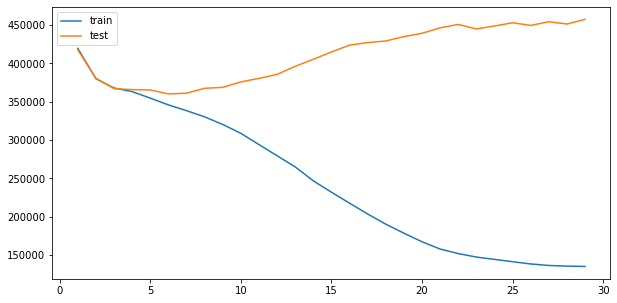

In [407]:
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))      # 그림의 크기 설정
plt.plot(range(1,30),train_score_list, label='train' ) # 선 그래프 그리기
plt.plot(range(1,30),val_score_list, label='test' ) # 선 그래프 그리기
plt.legend() # 범례
plt.show()

In [410]:
# 최적의 하이퍼파라미터 설정
final_model = DecisionTreeRegressor(max_depth=5)
final_model.fit(X_train3,y_train3)
pre = final_model.predict(X_test)

In [411]:
submission['Price'] =pre
submission.to_csv("./data/house/myprediction3.csv" , index=False)